查看dataset的train部分

In [ ]:
import h5py
import matplotlib.pyplot as plt

with h5py.File('datasets/train_catvnoncat.h5', "r") as train_dataset:
    # 列出所有组和数据集
    # print("所有组和数据集：")
    # for name, obj in train_dataset.items():
        # print(name, obj)

    dataset_x = train_dataset['train_set_x']
    dataset_y = train_dataset['train_set_y']
    # print(dataset_x)
    # print(dataset_y)

    # 打印数据集内容
    # 打印数据集的形状
    # print("train_set_x的形状:", dataset_x.shape)
    # print("train_set_y的形状:", dataset_y.shape)
    # 打印数据集的前5个元素
    # print("train_set_x前5个元素:", dataset_x[:5])
    # print("train_set_y前5个元素:", dataset_y[:5])

    # 分类标签
    list_classes = train_dataset['list_classes']
    # print("分类标签:", list_classes[:])

    # 可视化
    # for i in range(10):
    #     plt.figure(figsize=(2, 2))
    #     plt.imshow(dataset_x[i])
    #     plt.title(f"Label: {list_classes[dataset_y[i]].decode()}")
    #     plt.axis('off')
    #     plt.show()

所需要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

数据加载函数

In [2]:
def load_dataset():

    # 读取训练集
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset['train_set_x'][:]) # 加 [:] 是把数据从 h5py.Dataset 转换为 numpy.ndarray;外层再用 np.array() 是为了确保类型一致（有时是冗余的，但保险）。
    train_set_y_orig = np.array(train_dataset['train_set_y'][:])

    # 读取测试集
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset['test_set_x'][:])
    test_set_y_orig = np.array(test_dataset['test_set_y'][:])

    # 获取类别标签
    classes = np.array(test_dataset['list_classes'][:])

    # 标签 reshape 处理
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0])) # 原始标签形状是 (m,)，现在 reshape 成 (1, m)，很多神经网络实现中要求标签是形如 (1, m) 的二维数组
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    # 返回所有数据
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

测试


In [6]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()
print("训练集中包含图片数量：", X_train.shape[0])
print("每张图像的形状：", X_train.shape[1:])

训练集中包含图片数量： 209
每张图像的形状： (64, 64, 3)


把这些数据加载到主程序里面

In [3]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


查看一下训练集里面的第26张图片

标签： [1]
该图片对应的类别是： cat


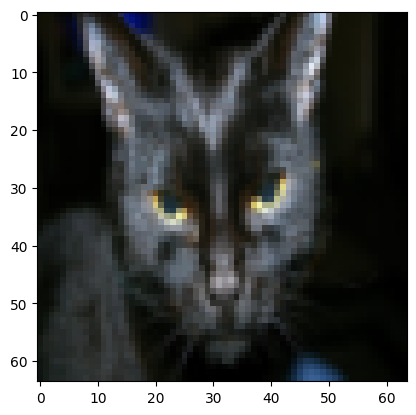

In [8]:
index = 25
print("标签：", train_set_y[:, index])
print("该图片对应的类别是：", classes[np.squeeze(train_set_y[:, index])].decode("utf-8"))
plt.imshow(train_set_x_orig[index])

结合一下训练集里面的数据来看一下我到底都加载了一些什么东西

In [9]:
#打印出当前的训练标签值
#使用np.squeeze的目的是压缩维度，【未压缩】train_set_y[:,index]的值为[1] , 【压缩后】np.squeeze(train_set_y[:,index])的值为1
#print("【使用np.squeeze：" + str(np.squeeze(train_set_y[:,index])) + "，不使用np.squeeze： " + str(train_set_y[:,index]) + "】")
#只有压缩后的值才能进行解码操作
print("y=" + str(train_set_y[:,index]) + ", it's a " + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + "' picture")

y=[1], it's a cat' picture


m_train ：训练集里图片的数量。

m_test ：测试集里图片的数量。

num_px ： 训练、测试集里面的图片的宽度和高度（均为64x64）。

记住，train_set_x_orig 是一个维度为(m_train，num_px，num_px，3）的数组。

In [4]:
m_train = train_set_x_orig.shape[0]
# print(m_train) # 209
m_test = test_set_x_orig.shape[0]
# print(m_test) # 50
num_px = train_set_x_orig.shape[1]
# print(num_px) # 64

# 看一看我们加载的东西的具体情况
print("训练集的数量: m_train = " + str(m_train)) # 训练集的数量: m_train = 209
print("测试集的数量 : m_test = " + str(m_test)) # 测试集的数量 : m_test = 50
print("每张图片的宽/高（均为）: num_px = " + str(num_px)) # 每张图片的宽/高（均为）: num_px = 64
print("每张图片的大小: (" + str(num_px) + ", " + str(num_px) + ", 3)") # 每张图片的大小: (64, 64, 3)
print("训练集_图片的维数: " + str(train_set_x_orig.shape)) # 训练集_图片的维数: (209, 64, 64, 3)
print("训练集_标签的维数: " + str(train_set_y.shape)) # 训练集_标签的维数: (1, 209)
print("测试集_图片的维数: " + str(test_set_x_orig.shape)) # 测试集_图片的维数: (50, 64, 64, 3)
print("测试集_标签的维数: " + str(test_set_y.shape)) # 测试集_标签的维数: (1, 50)

训练集的数量: m_train = 209
测试集的数量 : m_test = 50
每张图片的宽/高（均为）: num_px = 64
每张图片的大小: (64, 64, 3)
训练集_图片的维数: (209, 64, 64, 3)
训练集_标签的维数: (1, 209)
测试集_图片的维数: (50, 64, 64, 3)
测试集_标签的维数: (1, 50)


为了方便，我们要把维度为（64，64，3）的numpy数组重新构造为（64 x 64 x 3，1）的数组，要乘以3的原因是每张图片是由64x64像素构成的，而每个像素点由（R，G，B）三原色构成的，所以要乘以3。在此之后，我们的训练和测试数据集是一个numpy数组，【每列代表一个平坦的图像】 ，应该有m_train和m_test列。

当你想将形状（a，b，c，d）的矩阵X平铺成形状（b * c * d，a）的矩阵X_flatten时，可以使用以下代码：

In [5]:
#X_flatten = X.reshape(X.shape [0]，-1).T ＃X.T是X的转置
#将训练集的维度降低并转置。
# print(train_set_x_orig.shape[0]) # 209
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T # 等价于train_set_x_flatten.shape == (209, 64×64×3) = (209, 12288)
# print("train_set_x_flatten的形状：" + str(train_set_x_flatten.shape)) # train_set_x_flatten的形状：(12288, 209)

# print("============numpy中reshape自动推导规则==============")
# # 只要其他维度相乘后的结果能整除，它就能唯一地推导出那个缺省值是多少。
# print(train_set_x_orig.size) # 2568192
# print(12288 * 209) # 2568192

test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print(test_set_x_flatten.shape) # (12288, 50)

(12288, 50)


看看降维之后的情况是怎么样的

In [86]:
print("训练集的降维后的数据：" + str(train_set_x_flatten.shape))
print("训练集_标签的维数：" + str(train_set_y.shape))
print("测试集的降维后的数据：" + str(test_set_x_flatten.shape))
print("测试集_标签的维数：" + str(test_set_y.shape))

训练集的降维后的数据：(12288, 209)
训练集_标签的维数：(1, 209)
测试集的降维后的数据：(12288, 50)
测试集_标签的维数：(1, 50)


为了表示彩色图像，必须为每个像素指定红色，绿色和蓝色通道（RGB），因此像素值实际上是从0到255范围内的三个数字的向量。机器学习中一个常见的预处理步骤是对数据集进行居中和标准化，这意味着可以减去每个示例中整个numpy数组的平均值，然后将每个示例除以整个numpy数组的标准偏差。但对于图片数据集，它更简单，更方便，几乎可以将数据集的每一行除以255（像素通道的最大值），因为在RGB中不存在比255大的数据，所以我们可以放心的除以255，让标准化的数据位于[0,1]之间，现在标准化我们的数据集：


In [6]:
# print(train_set_x_flatten)
train_set_x = train_set_x_flatten / 255
# print(train_set_x)

test_set_x = test_set_x_flatten / 255
# print(test_set_x)

建立神经网络的主要步骤是：

定义模型结构（例如输入特征的数量）

初始化模型的参数

循环：

1. 计算当前损失（正向传播）

2. 计算当前梯度（反向传播）

3. 更新参数（梯度下降）

现在构建sigmoid()，需要使用 sigmoid（w ^ T x + b） 计算来做出预测。

In [7]:
def sigmoid(z):
    """
    参数：
        z  输入参数，数组

    返回：
        s  sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

# 测试sigmoid
print("sigmoid(0) = " + str(sigmoid(0)))
print("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.9998989708060922


构建tanh()

In [13]:
def tanh(z):
    """
    参数：
        z  输入参数，数组

    返回：
        s  tanh(z)
    """
    s = (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))
    return s

# 测试
print("tanh(0) = " + str(tanh(0)))
print("tanh(9.2) = " + str(tanh(9.2)))

tanh(0) = 0.0
tanh(9.2) = 0.9999999795820786


初始化参数w和b

In [8]:
def initialize_with_zeros(dim):
    """
    此函数为w创建一个维度为（dim，1）的0向量，并将b初始化为0。

    参数：
        dim  我们想要的w矢量的大小（或者这种情况下的参数数量）

    返回：
        w  权重，数组，维度为（dim，1）
        b  偏差，标量
    """
    w = np.zeros((dim, 1))
    b = 0
    # 使用断言来确保我要的数据是正确的 使用断言是为了在调试时更快地发现程序的错误 通过断言能“提前发现问题”
    assert (w.shape == (dim, 1)), 'w维度错误' # w的维度是(dim,1)
    assert (isinstance(b, float) or isinstance(b, int)), 'b维度错误' # b的类型是float或者是int

    return w, b

# 测试
dim = 5
w, b = initialize_with_zeros(dim)
print("w = " + str(w))
print("b = " + str(b))

w = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
b = 0


实现一个计算成本函数及其渐变的函数propagate（）

In [9]:
def propagate(w, b, X, Y):
    """
    实现前向和后向传播的成本函数及其梯度。
    参数：
        w  权重，数组，维度为（num_px * num_px * 3，1）
        b  偏差，标量
        X  数据集，维度为（num_px * num_px * 3，训练数量）
        Y  真实标签，维度为（1，训练数据数量）

    返回：
        cost-损失函数的计算
        dw-w的梯度，与w维度相同
        db-b的梯度，与b维度相同
    """
    m = X.shape[1]

    # 前向传播
    A = sigmoid(np.dot(w.T, X) + b) # 计算激活值
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) # 计算成本 Logistics Regression仅有一个神经元，所以计算一个激活值就可以计算损失值

    # 反向传播
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    # 使用断言确保我的数据是正确的
    assert (dw.shape == w.shape), "dw形状错误"
    assert (db.dtype == float), "db数值类型错误"
    cost = np.squeeze(cost)
    assert (cost.shape == ())

    # 创建一个字典，保存dw和db
    grads = {
        "dw": dw,
        "db": db
    }
    return (grads, cost)

# 测试
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


使用渐变下降更新参数 目标是通过最小化成本函数J来学习w和b.

In [10]:
def optmize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    此函数通过运行梯度下降算法来优化w和b

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数组。
        Y  - 真正的“标签”矢量（如果非猫则为0，如果是猫则为1），矩阵维度为(1,训练数据的数量)
        num_iterations  - 优化循环的迭代次数
        learning_rate  - 梯度下降更新规则的学习率
        print_cost  - 每100步打印一次损失值

    返回：
        params  - 包含权重w和偏差b的字典
        grads  - 包含权重和偏差相对于成本函数的梯度的字典
        成本 - 优化期间计算的所有成本列表，将用于绘制学习曲线。

    提示：
    我们需要写下两个步骤并遍历它们：
        1）计算当前参数的成本和梯度，使用propagate（）。
        2）使用w和b的梯度下降法则更新参数。
    """
    costs = []

    for i in range(num_iterations):

        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        # 记录成本
        if i % 100 == 0:
            costs.append(cost)

        # 打印成本数据
        if print_cost and i % 100 == 0:
            print("迭代的次数: %i ， 误差值： %f" % (i, cost))

    params = {
        "w": w,
        "b": b
    }

    grads = {
        "dw": dw,
        "db": db
    }

    return (params, grads, costs)

# 测试
w, b, X, Y = np.array([[1.], [2.]]), 2., np.array([[1., 2., -1.], [3., 4., -3.2]]), np.array([[1, 0, 1]])
params, grads, costs = optmize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("costs = " + str(costs))
print(type(costs))



w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657
costs = [5.801545319394553]
<class 'list'>


将预测值存储在向量Y_prediction中

In [11]:
def predict(w, b, X):
    """
    使用学习逻辑回归参数logistic （w，b）预测标签是0还是1，

    参数：
        w  - 权重，大小不等的数组（num_px * num_px * 3，1）
        b  - 偏差，一个标量
        X  - 维度为（num_px * num_px * 3，训练数据的数量）的数据

    返回：
        Y_prediction  - 包含X中所有图片的所有预测【0 | 1】的一个numpy数组（向量）

    """
    m = X.shape[1]
    Y_prediction = np.zeros((1, m)) # 初始化（1，m）的0向量
    w = w.reshape(X.shape[0], 1) # 重塑w，使其与X维度相同

    # 预测
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0

    assert (Y_prediction.shape == (1, m))

    return Y_prediction

# 测试
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
print("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1.]]


把这些函数统统整合到一个model()函数中，届时只需要调用一个model()就基本上完成所有的事了。

迭代的次数: 0 ， 误差值： 0.693147
迭代的次数: 100 ， 误差值： 0.584508
迭代的次数: 200 ， 误差值： 0.466949
迭代的次数: 300 ， 误差值： 0.376007
迭代的次数: 400 ， 误差值： 0.331463
迭代的次数: 500 ， 误差值： 0.303273
迭代的次数: 600 ， 误差值： 0.279880
迭代的次数: 700 ， 误差值： 0.260042
迭代的次数: 800 ， 误差值： 0.242941
迭代的次数: 900 ， 误差值： 0.228004
迭代的次数: 1000 ， 误差值： 0.214820
迭代的次数: 1100 ， 误差值： 0.203078
迭代的次数: 1200 ， 误差值： 0.192544
迭代的次数: 1300 ， 误差值： 0.183033
迭代的次数: 1400 ， 误差值： 0.174399
迭代的次数: 1500 ， 误差值： 0.166521
迭代的次数: 1600 ， 误差值： 0.159305
迭代的次数: 1700 ， 误差值： 0.152667
迭代的次数: 1800 ， 误差值： 0.146542
迭代的次数: 1900 ， 误差值： 0.140872
训练集准确性： 99.04306220095694 %
测试集准确性： 70.0 %
[0.69314718 0.58450836 0.46694904 0.37600687 0.33146329 0.30327307
 0.27987959 0.26004214 0.24294068 0.22800422 0.21481951 0.20307819
 0.19254428 0.18303334 0.17439859 0.1665214  0.15930452 0.15266732
 0.14654224 0.14087208]


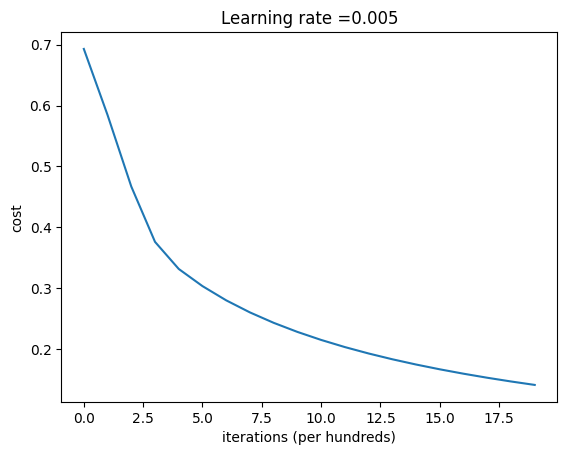

In [13]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    通过调用之前实现的函数来构建逻辑回归模型

    参数：
        X_train  - numpy的数组,维度为（num_px * num_px * 3，m_train）的训练集
        Y_train  - numpy的数组,维度为（1，m_train）（矢量）的训练标签集
        X_test   - numpy的数组,维度为（num_px * num_px * 3，m_test）的测试集
        Y_test   - numpy的数组,维度为（1，m_test）的（向量）的测试标签集
        num_iterations  - 表示用于优化参数的迭代次数的超参数
        learning_rate  - 表示optimize（）更新规则中使用的学习速率的超参数
        print_cost  - 设置为true以每100次迭代打印成本

    返回：
        d  - 包含有关模型信息的字典。
    """
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optmize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # 从字典“参数”中检索参数w和b
    w, b = parameters["w"], parameters["b"]

    # 预测测试/训练集的例子
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # 打印训练后的准确性
    print("训练集准确性：", format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100), "%")
    print("测试集准确性：", format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100), "%")

    # 将“参数”、“预测”和“成本”包装在字典中
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations
    }

    return d

# 测试
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)


#绘制图
costs = np.squeeze(d['costs'])
print(costs)
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()


画图


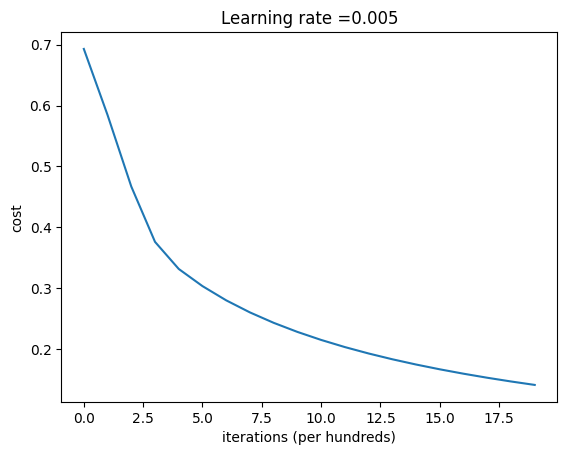

In [14]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

进一步分析一下，并研究学习率alpha的可能选择。为了让渐变下降起作用，我们必须明智地选择学习速率。学习率α \alphaα 决定了我们更新参数的速度。如果学习率过高，我们可能会“超过”最优值。同样，如果它太小，我们将需要太多迭代才能收敛到最佳值。这就是为什么使用良好调整的学习率至关重要的原因。

我们可以比较一下我们模型的学习曲线和几种学习速率的选择。也可以尝试使用不同于我们初始化的learning_rates变量包含的三个值，并看一下会发生什么。

learning rate is: 0.01
训练集准确性： 99.52153110047847 %
测试集准确性： 68.0 %

-------------------------------------------------------

learning rate is: 0.001
训练集准确性： 88.99521531100478 %
测试集准确性： 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
训练集准确性： 68.42105263157895 %
测试集准确性： 36.0 %

-------------------------------------------------------



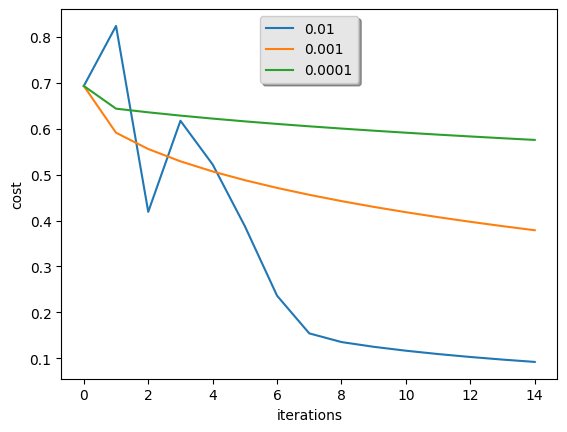

In [15]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
